## Predictive Analytics for Student Success(Model)

### CRISP_DM Methodological Steps:
<ul>
<li><a href="#1.Business_Understanding">Business Understanding</a></li>
<li><a href="#2.Data_Understanding">Data Understanding</a></li>
<li><a href="#3.Data_Preparation">Data Preparation</a></li>
<li><a href="#4.Modeling">Modeling</a></li>
<li><a href="#5.Evaluation">Evaluation</a></li>
<li><a href="#6.Deployment">Deployment</a></li>
</ul>

# 1.Business_Understanding

### 1.Business Problem
The project solves the problem of student dropout and underperformance. This issue leads to wasted potential, decreased motivation, and negative consequences. Predictive analytics identifies at-risk students and enables timely interventions. This approach improves student retention and success rates. Ultimately, it leads to better academic outcomes and a brighter future for students.

### 2.Business Goal

 The goal is to identify students who are at risk of dropping out or underperforming

<a id='intro'></a>
## Introduction
<span style="font-family:Impact; color: orange;">This is summary about the students dataset an some information about the data and key attribute:
</span>
### About dataset
1. **Student_ID**
2. **Quiz01**
3. **Assignment01**
4. **Midterm Exam**
5. **Assignment02**
6. **Assignment03**
7. **Final Exam**
8. **Course Grade**
9. **Total**
10. **Risk_Rate**

<span style="font-family:Impact; color: green;">an Summary of Predictive Analytics for Student Success Project:
</span>

**This project aims to apply artificial intelligence and machine learning techniques to analyze student data and predict academic outcomes. By using a KNeighbors Classifier algorithm, the model identifies students who are at risk of dropping out or underperforming. This early identification allows for timely and targeted interventions. The project is crucial in the educational sector as it helps institutions proactively support students, thereby enhancing their chances of academic success and improving overall educational outcomes...**

###  Importing Necessary Libraries

In [1]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import seaborn as sns  # Statistical data visualization
import matplotlib.pyplot as plt  # Plotting and visualization
import joblib


from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder  # Encoding categorical variables and scaling features
from sklearn.model_selection import train_test_split  # Data splitting and hyperparameter tuning
from sklearn.neighbors import KNeighborsClassifier  # KNeighbors Classifier
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.linear_model import LogisticRegression   # Logistic Regression Classifier # Logistic Regression Classifier
from sklearn.metrics import (accuracy_score,classification_report) # Metrics for model evaluation
from sklearn.utils import resample
#from imblearn.over_sampling import SMOTE

# 2.Data_Understanding

### Loading the Dataset

In [2]:
df=pd.read_csv('Student Performance Prediction-B.csv')

### Initial Data Exploration

**View the first few rows of the dataset**

In [3]:
df.head()

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class
0,student000000,95,91,70,90,84,64,85,85,G
1,student000001,85,76,65,61,73,64,76,76,G
2,student000002,85,41,73,61,73,61,73,73,G
3,student000003,80,78,80,79,79,57,80,79,G
4,student000004,85,70,55,40,41,0,60,50,W


**Get the shape of the dataset (number of rows and columns)**

In [4]:
df.shape

(486, 10)

**Summary statistics to get an overview of the data (mean, standard deviation, min, max, etc.)**

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quiz01 [10],486.0,75.353909,17.594817,0.0,70.0,80.0,85.00,100.0
Assignment01 [8],486.0,73.508230,19.805314,0.0,67.0,78.0,86.00,99.0
Midterm Exam [20],486.0,74.831276,15.523721,0.0,68.0,78.0,85.00,98.0
Assignment02 [12],486.0,74.722222,18.134293,0.0,70.0,79.0,86.75,97.0
Assignment03 [25],486.0,78.395062,16.517541,0.0,74.0,82.0,88.00,100.0
Final Exam [35],486.0,60.269547,17.311440,0.0,51.0,63.0,73.00,93.0
Course Grade,486.0,77.831276,15.793915,0.0,73.0,82.0,87.00,100.0
Total [100],486.0,77.893004,16.121474,0.0,73.0,82.0,87.00,102.0


**Information about the dataset to see data types, non-null counts, etc**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Student ID         486 non-null    object
 1   Quiz01 [10]        486 non-null    int64 
 2   Assignment01 [8]   486 non-null    int64 
 3   Midterm Exam [20]  486 non-null    int64 
 4   Assignment02 [12]  486 non-null    int64 
 5   Assignment03 [25]  486 non-null    int64 
 6   Final Exam [35]    486 non-null    int64 
 7   Course Grade       486 non-null    int64 
 8   Total [100]        486 non-null    int64 
 9   Class              486 non-null    object
dtypes: int64(8), object(2)
memory usage: 38.1+ KB


**Check for null values**

In [7]:
df.isnull().sum()

Student ID           0
Quiz01 [10]          0
Assignment01 [8]     0
Midterm Exam [20]    0
Assignment02 [12]    0
Assignment03 [25]    0
Final Exam [35]      0
Course Grade         0
Total [100]          0
Class                0
dtype: int64

**Explor Data Analysis(EDA)**

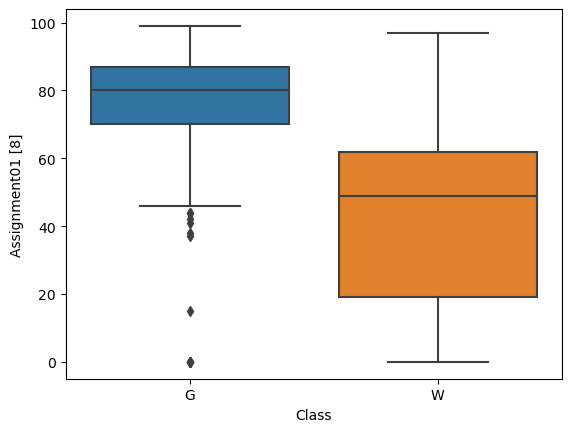

In [23]:
ax=sns.boxplot(data=df,x='Class',y='Assignment01 [8]')

**EDA2**

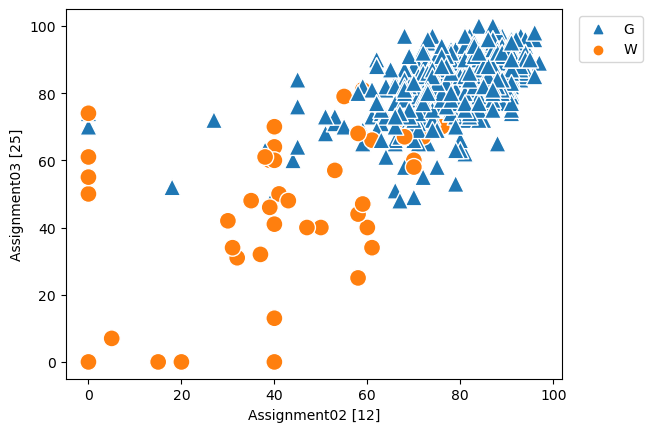

In [26]:
ax = sns.scatterplot(data = df, 
                     x = 'Assignment02 [12]', 
                     y = 'Assignment03 [25]', 
                     hue = 'Class', 
                     style = 'Class', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

**Check Balance(EDA3)**

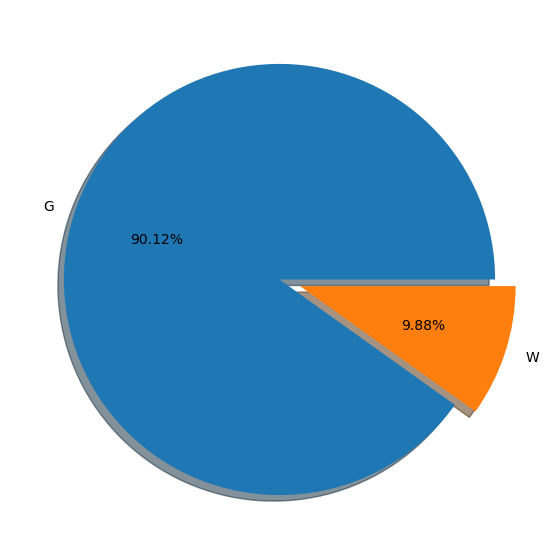

In [8]:
#booking_status columns
plt.figure(figsize=(7,7))
plt.pie(x=df['Class'].value_counts(),labels=df['Class'].unique(),explode=[0.0,0.1],autopct='%0.2f%%',shadow=True)
plt.show()

**Some Information About The Data(EDA4)**

array([[<AxesSubplot:title={'center':'Quiz01 [10]'}>,
        <AxesSubplot:title={'center':'Assignment01 [8]'}>,
        <AxesSubplot:title={'center':'Midterm Exam [20]'}>],
       [<AxesSubplot:title={'center':'Assignment02 [12]'}>,
        <AxesSubplot:title={'center':'Assignment03 [25]'}>,
        <AxesSubplot:title={'center':'Final Exam [35]'}>],
       [<AxesSubplot:title={'center':'Course Grade'}>,
        <AxesSubplot:title={'center':'Total [100]'}>, <AxesSubplot:>]],
      dtype=object)

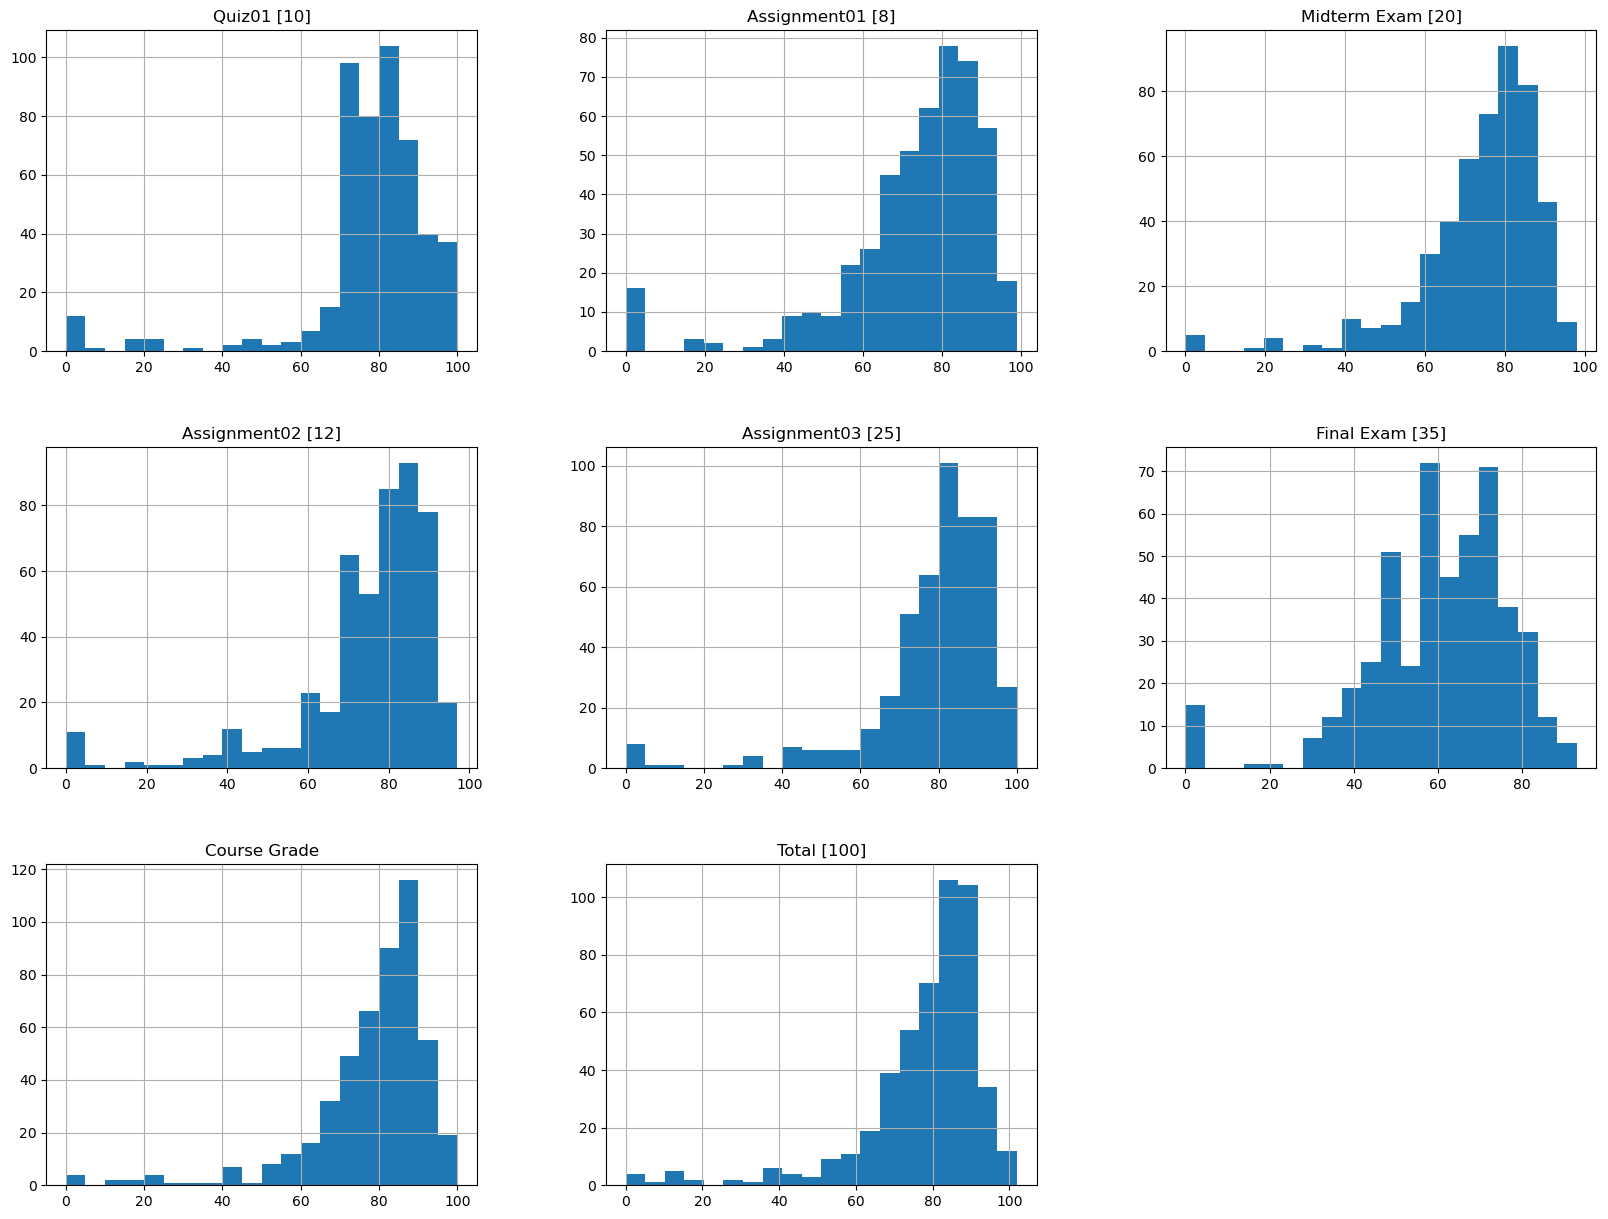

In [9]:
df.hist(bins=20,figsize=(20,15))

# 3.Data_Preparation

In [10]:
df.head()

,Student ID,Quiz01 [10],Assignment01 [8],Midterm Exam [20],Assignment02 [12],Assignment03 [25],Final Exam [35],Course Grade,Total [100],Class
0,student000000,95,91,70,90,84,64,85,85,G
1,student000001,85,76,65,61,73,64,76,76,G
2,student000002,85,41,73,61,73,61,73,73,G
3,student000003,80,78,80,79,79,57,80,79,G
4,student000004,85,70,55,40,41,0,60,50,W


**Convert X and Y to numpy arrays**

In [11]:
X = df.drop(columns=['Student ID','Class']).to_numpy()
Y = df['Class'].to_numpy()

# Print the shapes of X and Y
print(X.shape)
print(Y.shape)

(486, 8)
(486,)


In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# 4.Modeling

In [13]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)

KNeighborsClassifier()

# 5.Evaluation

In [14]:
y_pred_log = model.predict(X_test)

**Model training accuracy**

In [15]:
model.score(X_train,Y_train)

0.9819587628865979

**Model testing accuracy**

In [16]:
model.score(X_test,Y_test)

0.9693877551020408

**Save the trained model**

In [17]:
model_file = 'KNeighborsClassifier.pkl'
joblib.dump(model, model_file)
print(f"model saved as {model_file}.")

model saved as KNeighborsClassifier.pkl.


# 6.Deployment

<span style="font-family:Impact; color: green;">This is Link for Interface (http://127.0.0.1:7863)
</span>